## Setup

In [1]:
# feel free to ignore this cell: we just define some helper functions
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import imageio.v2 as imageio
import io
import base64
from IPython.display import HTML

def gif(plot_func, frames, name="mygif.gif", **kwargs):
    with imageio.get_writer(name, mode="I", **kwargs) as writer:
        for i in frames:
            plot_func(i)

            tmp_file = io.BytesIO()
            plt.savefig(tmp_file, bbox_inches="tight")
            plt.close()

            tmp_file.seek(0)
            image = imageio.imread(tmp_file)
            writer.append_data(image)

    with open(name, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("ascii")
    return HTML(f'<img src="data:image/gif;base64,{b64}" width=480px/>')

def arrow(force, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    
    x, y = force
    style = dict(
        head_width=0.05, 
        head_length=0.1, 
        length_includes_head=True, 
        overhang=0.2, 
        linewidth=1
    )
    style.update(kwargs)
    ax.arrow(0, 0, x, y, **style)


def plot_distance(a, b, *args, ax=None, lnorm=2, **kwargs):
    if ax is None:
        ax = plt.gca()

    a_x, a_y = a
    b_x, b_y = b
    xs = [a_x, b_x] if lnorm == 2 else [a_x, a_x, b_x]
    ys = [a_y, b_y] if lnorm == 2 else [a_y, b_y, b_y]
    style=dict(label=f"L{lnorm} " + ("(MAE)" if lnorm == 1 else "(RMSE)"))
    style.update(kwargs)
    ax.plot(xs, ys, *args, **style)


def prettify(ax=None, lim=0.77):
    if ax is None:
        ax = plt.gca()
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.legend(bbox_to_anchor=(1.03, 0.5), loc="center left", fancybox=False, title="Distance")

# Force Plot

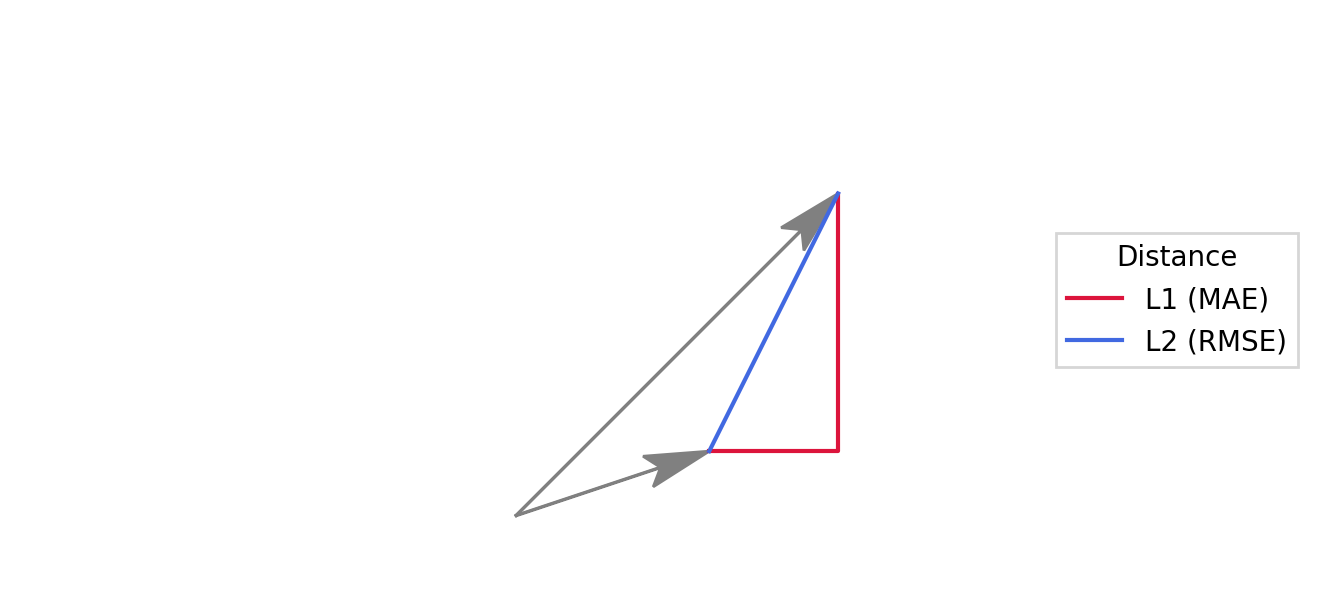

In [2]:
force_a = [0.5, 0.5]
force_b = [0.3, 0.1]

arrow(force_a, color='gray')
arrow(force_b, color='gray')

plot_distance(force_a, force_b, color="crimson", lnorm=1)
plot_distance(force_a, force_b, color="royalblue", lnorm=2)

prettify()
plt.ylim(bottom=-0.1);

In [3]:
import numpy as np

# componentwise definitions for force errors
def rmse(a, b):
    return np.sqrt(np.mean((a - b)**2))

def mae(a, b):
    return np.mean(np.abs(a - b))

In [4]:
def rotate(theta, x):
    cos, sin = np.cos(theta), np.sin(theta)
    rotation = np.array([[cos, -sin], [sin, cos]])
    return rotation.dot(x)


thetas = np.linspace(0, 2*np.pi, 200)
force_as = [rotate(theta, force_a) for theta in thetas]
force_bs = [rotate(theta, force_b) for theta in thetas]
thetas = np.degrees(thetas)

rmses = [rmse(a, b) for a, b in zip(force_as, force_bs)]
maes = [mae(a, b) for a, b in zip(force_as, force_bs)]


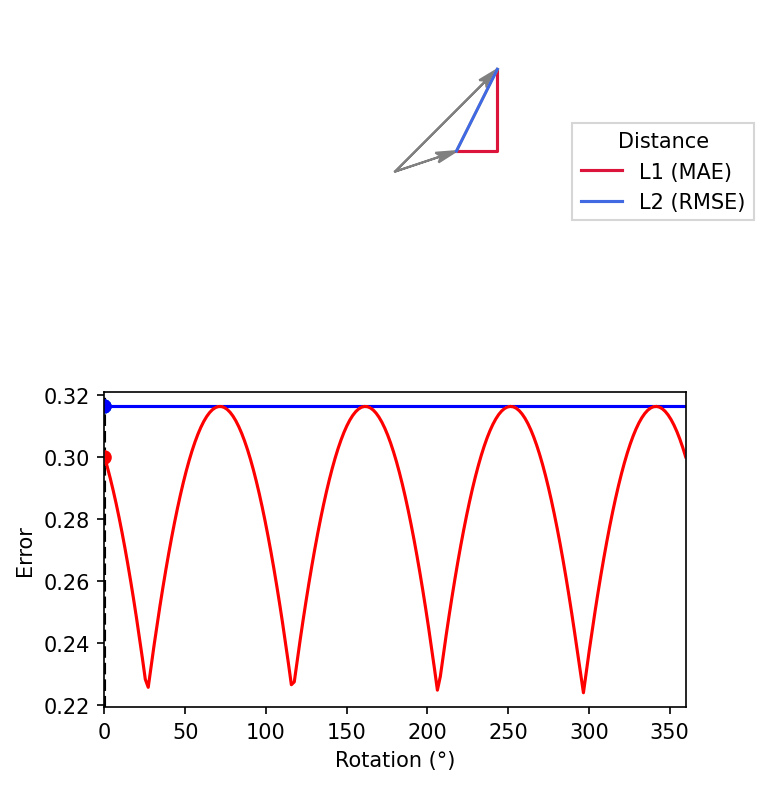

In [5]:
def do_plot(idx):
    fig, (arrow_ax, error_ax) = plt.subplots(2, figsize=(5, 6), dpi=150)
    
    force_a, force_b = force_as[idx], force_bs[idx]
    theta = thetas[idx]

    arrow(force_a, ax=arrow_ax, color='gray')
    arrow(force_b, ax=arrow_ax, color='gray')
    plot_distance(force_a, force_b, color="crimson", lnorm=1, ax=arrow_ax)
    plot_distance(force_a, force_b, color="royalblue", lnorm=2, ax=arrow_ax)
    prettify(ax=arrow_ax)
    
    
    error_ax.plot(thetas, rmses, label='L2', c='b')
    error_ax.plot(thetas, maes, label='L1', c='r')
    error_ax.scatter(theta, rmses[idx], c='b')
    error_ax.scatter(theta, maes[idx], c='r')
    error_ax.axvline(x=theta, c='k', linestyle='dashed', zorder=-1)
    error_ax.set_xlim(0, 360)
    error_ax.set_xlabel('Rotation (°)')
    error_ax.set_ylabel('Error')


gif(do_plot, range(len(thetas)), name="images/rotation.gif", fps=24)